In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

In [2]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.2 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset


In [4]:
data = load_dataset("lex_glue","ecthr_b")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/9000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [5]:
data

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 9000
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['text', 'labels'],
        num_rows: 1000
    })
})

In [6]:
train = pd.DataFrame(data['train'])
train

,text,labels
0,[11. At the beginning of the events relevant ...,[4]
1,[9. The applicant is the monarch of Liechtens...,"[8, 3, 9]"
2,[9. In June 1949 plots of agricultural land o...,[3]
3,"[8. In 1991 Mr Dušan Slobodník, a research wo...","[6, 8, 5]"
4,"[9. The applicant is an Italian citizen, born...","[8, 3]"
...,...,...
8995,[5. The applicant was born in 1960 and lives ...,"[3, 4]"
8996,[5. The applicant was born in 1946 and is cur...,[]
8997,"[5. The applicants are Russian nationals who,...","[0, 1, 2]"
8998,[8. In all cases the applicants brought civil...,"[3, 9]"


In [7]:
val = pd.DataFrame(data['validation'])
val

,text,labels
0,[5. The applicant was born in 1983 and is det...,[4]
1,[5. The applicant was born in 1982 and is cur...,[1]
2,[5. The applicant was born in 1955 and lives ...,"[1, 3]"
3,[6. The applicant was born in 1977 and lives ...,[]
4,[6. The applicants were born in 1983 and 2007...,"[7, 2, 3, 4]"
...,...,...
995,[5. The applicant was born in 1965 and lives ...,[7]
996,[4. The applicant was born in 1954 and lives ...,[3]
997,[5. The applicant company was a Ukrainian joi...,[3]
998,[5. The applicant was born in 1985 and lives ...,[2]


In [8]:
test = pd.DataFrame(data['test'])
test

,text,labels
0,"[5. The applicant is a journalist for DN.no, ...",[6]
1,[5. The applicant was born in 1940 and lives ...,[4]
2,[5. The applicant was born in 1965 and lives ...,[3]
3,[5. The applicant was born in 1967 and lives ...,[3]
4,[5. The applicant was born in 1967 and lives ...,"[1, 3]"
...,...,...
995,[5. The applicants were born in 1971 and 1976...,"[6, 3]"
996,"[5. The applicant, who was born in 1948, live...","[6, 1, 2, 3]"
997,[5. The applicant was born in 1980 and lives ...,[3]
998,[4. The applicant was born in 1972 and is det...,[1]


In [9]:
df_train = pd.get_dummies(train['labels'].apply(pd.Series).stack(), prefix='Class').groupby(level=0).sum()

<ipython-input-9-c58a9fb6aa34>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_train = pd.get_dummies(train['labels'].apply(pd.Series).stack(), prefix='Class').groupby(level=0).sum()


In [10]:
train = pd.concat([train, df_train], axis=1)
train = train.fillna(0)

In [11]:
df_val = pd.get_dummies(val['labels'].apply(pd.Series).stack(), prefix='Class').groupby(level=0).sum()

<ipython-input-11-ee93965a821d>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_val = pd.get_dummies(val['labels'].apply(pd.Series).stack(), prefix='Class').groupby(level=0).sum()


In [12]:
val = pd.concat([val, df_val], axis=1)
val = val.fillna(0)

In [13]:
val

,text,labels,Class_0.0,Class_1.0,Class_2.0,Class_3.0,Class_4.0,Class_5.0,Class_6.0,Class_7.0,Class_8.0,Class_9.0
0,[5. The applicant was born in 1983 and is det...,[4],0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,[5. The applicant was born in 1982 and is cur...,[1],0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[5. The applicant was born in 1955 and lives ...,"[1, 3]",0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,[6. The applicant was born in 1977 and lives ...,[],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,[6. The applicants were born in 1983 and 2007...,"[7, 2, 3, 4]",0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,[5. The applicant was born in 1965 and lives ...,[7],0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
996,[4. The applicant was born in 1954 and lives ...,[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,[5. The applicant company was a Ukrainian joi...,[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
998,[5. The applicant was born in 1985 and lives ...,[2],0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_test = pd.get_dummies(test['labels'].apply(pd.Series).stack(), prefix='Class').groupby(level=0).sum()

<ipython-input-14-dec4fdbbe68d>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_test = pd.get_dummies(test['labels'].apply(pd.Series).stack(), prefix='Class').groupby(level=0).sum()


In [15]:
test = pd.concat([test, df_test], axis=1)
test = test.fillna(0)

In [16]:
import nltk
from nltk.corpus import stopwords
import re
import string

In [17]:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

In [18]:
def do_tokens(text):
    # print(text)
    tokens = text.split()
    return tokens

In [19]:
train['text'] = train['text'].apply(lambda x: remove_punctuation(str(x)))

In [20]:
val['text'] = val['text'].apply(lambda x: remove_punctuation(str(x)))

In [21]:
test['text'] = test['text'].apply(lambda x: remove_punctuation(str(x)))

In [22]:
train['text']= train['text'].apply(lambda x: x.lower())

In [23]:
val['text']= val['text'].apply(lambda x: x.lower())

In [24]:
test['text']= test['text'].apply(lambda x: x.lower())

In [25]:
train['text'] = train['text'].apply(lambda x: do_tokens(x))

In [26]:
val['text'] = val['text'].apply(lambda x: do_tokens(x))

In [27]:
test['text'] = test['text'].apply(lambda x: do_tokens(x))

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [30]:
train['text'] = train['text'].apply(lambda x: remove_stopwords(x))

In [31]:
val['text'] = val['text'].apply(lambda x: remove_stopwords(x))

In [32]:
test['text'] = test['text'].apply(lambda x: remove_stopwords(x))

In [33]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text


In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [35]:
train['text'] = train['text'].apply(lambda x: lemmatizer(x))


In [36]:
val['text'] = val['text'].apply(lambda x: lemmatizer(x))

In [37]:
test['text'] = test['text'].apply(lambda x: lemmatizer(x))

In [38]:
train

,text,labels,Class_0.0,Class_1.0,Class_2.0,Class_3.0,Class_4.0,Class_5.0,Class_6.0,Class_7.0,Class_8.0,Class_9.0
0,"[11, beginning, event, relevant, application, ...",[4],0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,"[9, applicant, monarch, liechtenstein, born, 1...","[8, 3, 9]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,"[9, june, 1949, plot, agricultural, land, owne...",[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[8, 1991, mr, dušan, slobodník, research, work...","[6, 8, 5]",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,"[9, applicant, italian, citizen, born, 1947, l...","[8, 3]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,"[5, applicant, born, 1960, life, village, kara...","[3, 4]",0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8996,"[5, applicant, born, 1946, currently, detentio...",[],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8997,"[5, applicant, russian, national, material, ti...","[0, 1, 2]",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8998,"[8, case, applicant, brought, civil, proceedin...","[3, 9]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
val

,text,labels,Class_0.0,Class_1.0,Class_2.0,Class_3.0,Class_4.0,Class_5.0,Class_6.0,Class_7.0,Class_8.0,Class_9.0
0,"[5, applicant, born, 1983, detained, sztum, 6,...",[4],0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,"[5, applicant, born, 1982, currently, detained...",[1],0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[5, applicant, born, 1955, life, narofominsk, ...","[1, 3]",0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[6, applicant, born, 1977, life, luton, 7, app...",[],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[6, applicant, born, 1983, 2007, respectively,...","[7, 2, 3, 4]",0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,"[5, applicant, born, 1965, life, budapest, 6, ...",[7],0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
996,"[4, applicant, born, 1954, life, donji, kralje...",[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,"[5, applicant, company, ukrainian, jointstock,...",[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
998,"[5, applicant, born, 1985, life, warsaw, 6, 14...",[2],0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
test

,text,labels,Class_0.0,Class_1.0,Class_2.0,Class_3.0,Class_4.0,Class_5.0,Class_6.0,Class_7.0,Class_8.0,Class_9.0
0,"[5, applicant, journalist, dnno, norwegian, in...",[6],0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,"[5, applicant, born, 1940, life, odesa, 6, tim...",[4],0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,"[5, applicant, born, 1965, life, smědčice, 6, ...",[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[5, applicant, born, 1967, life, kyiv, 6, time...",[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[5, applicant, born, 1967, life, staro, oryaho...","[1, 3]",0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,"[5, applicant, born, 1971, 1976, detained, lip...","[6, 3]",0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
996,"[5, applicant, born, 1948, life, corjova, vill...","[6, 1, 2, 3]",0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
997,"[5, applicant, born, 1980, life, grimăncăuți, ...",[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
998,"[4, applicant, born, 1972, detained, orsk, 5, ...",[1],0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from gensim.models import Word2Vec

In [42]:
w2v_model = Word2Vec(vector_size=128,window=3,min_count=1)
print(w2v_model)

Word2Vec<vocab=0, vector_size=128, alpha=0.025>


In [43]:
w2v_model.build_vocab(train['text'])
print(w2v_model)

Word2Vec<vocab=132021, vector_size=128, alpha=0.025>


In [44]:
w2v_model.train(train['text'],total_examples=w2v_model.corpus_count,epochs=5)

(37168805, 39927510)

In [45]:
words = set(w2v_model.wv.index_to_key)
train['text_vect'] = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in train['text']])

<ipython-input-45-f1990ce81405>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train['text_vect'] = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in train['text']])


In [46]:
train

,text,labels,Class_0.0,Class_1.0,Class_2.0,Class_3.0,Class_4.0,Class_5.0,Class_6.0,Class_7.0,Class_8.0,Class_9.0,text_vect
0,"[11, beginning, event, relevant, application, ...",[4],0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[[-0.35126588, 0.30662367, -0.9495547, 0.26814..."
1,"[9, applicant, monarch, liechtenstein, born, 1...","[8, 3, 9]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,"[[-0.48577222, 0.34520772, -0.9127793, 0.67593..."
2,"[9, june, 1949, plot, agricultural, land, owne...",[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-0.48577222, 0.34520772, -0.9127793, 0.67593..."
3,"[8, 1991, mr, dušan, slobodník, research, work...","[6, 8, 5]",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,"[[-0.4723314, 0.3140576, -1.1809076, 0.2749333..."
4,"[9, applicant, italian, citizen, born, 1947, l...","[8, 3]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,"[[-0.48577222, 0.34520772, -0.9127793, 0.67593..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,"[5, applicant, born, 1960, life, village, kara...","[3, 4]",0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
8996,"[5, applicant, born, 1946, currently, detentio...",[],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
8997,"[5, applicant, russian, national, material, ti...","[0, 1, 2]",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
8998,"[8, case, applicant, brought, civil, proceedin...","[3, 9]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,"[[-0.4723314, 0.3140576, -1.1809076, 0.2749333..."


In [47]:
val['text_vect'] = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in val['text']])

<ipython-input-47-83a6951b1869>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val['text_vect'] = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in val['text']])


In [48]:
val

,text,labels,Class_0.0,Class_1.0,Class_2.0,Class_3.0,Class_4.0,Class_5.0,Class_6.0,Class_7.0,Class_8.0,Class_9.0,text_vect
0,"[5, applicant, born, 1983, detained, sztum, 6,...",[4],0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
1,"[5, applicant, born, 1982, currently, detained...",[1],0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
2,"[5, applicant, born, 1955, life, narofominsk, ...","[1, 3]",0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
3,"[6, applicant, born, 1977, life, luton, 7, app...",[],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-0.9138807, -0.24615219, -1.2167721, 0.52997..."
4,"[6, applicant, born, 1983, 2007, respectively,...","[7, 2, 3, 4]",0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,"[[-0.9138807, -0.24615219, -1.2167721, 0.52997..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"[5, applicant, born, 1965, life, budapest, 6, ...",[7],0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
996,"[4, applicant, born, 1954, life, donji, kralje...",[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-1.153713, 0.2811641, -1.0104134, 0.17167486..."
997,"[5, applicant, company, ukrainian, jointstock,...",[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
998,"[5, applicant, born, 1985, life, warsaw, 6, 14...",[2],0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."


In [49]:
test['text_vect'] = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in test['text']])

<ipython-input-49-64d5930fc470>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test['text_vect'] = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in test['text']])


In [50]:
test

,text,labels,Class_0.0,Class_1.0,Class_2.0,Class_3.0,Class_4.0,Class_5.0,Class_6.0,Class_7.0,Class_8.0,Class_9.0,text_vect
0,"[5, applicant, journalist, dnno, norwegian, in...",[6],0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
1,"[5, applicant, born, 1940, life, odesa, 6, tim...",[4],0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
2,"[5, applicant, born, 1965, life, smědčice, 6, ...",[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
3,"[5, applicant, born, 1967, life, kyiv, 6, time...",[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
4,"[5, applicant, born, 1967, life, staro, oryaho...","[1, 3]",0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"[5, applicant, born, 1971, 1976, detained, lip...","[6, 3]",0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
996,"[5, applicant, born, 1948, life, corjova, vill...","[6, 1, 2, 3]",0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
997,"[5, applicant, born, 1980, life, grimăncăuți, ...",[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-1.0554217, -0.28841022, -0.58796203, 0.1597..."
998,"[4, applicant, born, 1972, detained, orsk, 5, ...",[1],0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[-1.153713, 0.2811641, -1.0104134, 0.17167486..."


In [51]:
train_vect_avg = []
for v in train['text_vect']:
    if v.size:
        train_vect_avg.append(v.mean(axis=0))
    else:
        train_vect_avg.append(np.zeros(128, dtype=float))

train['text_vect_avg'] = train_vect_avg

In [52]:
val_vect_avg = []
for v in val['text_vect']:
    if v.size:
        val_vect_avg.append(v.mean(axis=0))
    else:
        val_vect_avg.append(np.zeros(128, dtype=float))

val['text_vect_avg'] = val_vect_avg

In [53]:
test_vect_avg = []
for v in test['text_vect']:
    if v.size:
        test_vect_avg.append(v.mean(axis=0))
    else:
        test_vect_avg.append(np.zeros(128, dtype=float))

test['text_vect_avg'] = test_vect_avg

In [54]:
classes = list(df_train.columns)
classes

['Class_0.0',
 'Class_1.0',
 'Class_2.0',
 'Class_3.0',
 'Class_4.0',
 'Class_5.0',
 'Class_6.0',
 'Class_7.0',
 'Class_8.0',
 'Class_9.0']

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           9000 non-null   object 
 1   labels         9000 non-null   object 
 2   Class_0.0      9000 non-null   float64
 3   Class_1.0      9000 non-null   float64
 4   Class_2.0      9000 non-null   float64
 5   Class_3.0      9000 non-null   float64
 6   Class_4.0      9000 non-null   float64
 7   Class_5.0      9000 non-null   float64
 8   Class_6.0      9000 non-null   float64
 9   Class_7.0      9000 non-null   float64
 10  Class_8.0      9000 non-null   float64
 11  Class_9.0      9000 non-null   float64
 12  text_vect      9000 non-null   object 
 13  text_vect_avg  9000 non-null   object 
dtypes: float64(10), object(4)
memory usage: 984.5+ KB


In [65]:
v = train[classes].sum()
v

Class_0.0     623.0
Class_1.0    1740.0
Class_2.0    1623.0
Class_3.0    5437.0
Class_4.0    1056.0
Class_5.0      81.0
Class_6.0     441.0
Class_7.0     162.0
Class_8.0     444.0
Class_9.0    1558.0
dtype: float64

<Axes: >

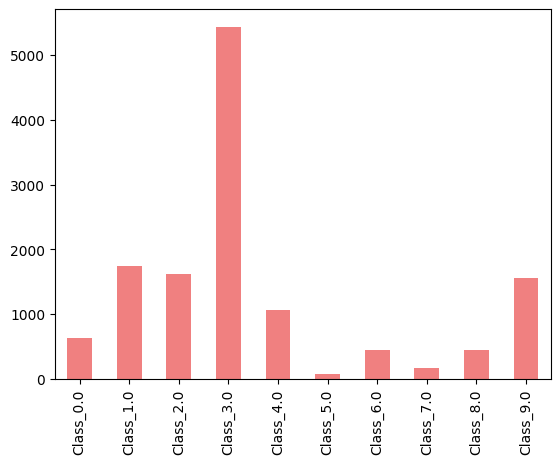

In [66]:
v.plot(kind='bar', color='lightcoral')

In [61]:
len(train['text'][0])

3744

In [68]:
train['len'] = train['text'].apply(lambda x: len(x))
l = train['len'].value_counts()
l


186     22
165     21
353     20
153     20
339     20
        ..
1113     1
1413     1
1429     1
1230     1
2156     1
Name: len, Length: 2429, dtype: int64

In [57]:
ldevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# **MLP Model**

In [64]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()

        # Define layers
        self.layer1 = nn.Linear(128, 20)
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(20, 10)
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        # x = self.sigmoid(x)
        return x


model = Model1()
model.to(device)


Model1(
  (layer1): Linear(in_features=128, out_features=20, bias=True)
  (activation): ReLU()
  (layer2): Linear(in_features=20, out_features=10, bias=True)
)

In [65]:
# path = torch.tensor(train.iloc[1]['text_vect_avg'])
# # class_id = torch.FloatTensor(train.iloc[1][classes])

In [66]:
# path.shape

In [67]:
class make_data1(Dataset):
  def __init__(self,df):
    self.df = df

  def __len__(self):
    return len(self.df)

  def __getitem__(self, inx):
    enc = self.df.iloc[inx]['text_vect_avg']
    class_id = self.df.iloc[inx][classes]

    return torch.tensor(enc),torch.FloatTensor(class_id)

In [68]:
train_dataset = make_data1(train)
val_dataset = make_data1(val)
test_dataset = make_data1(test)

In [69]:
batch_size = 16
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
val_loader = DataLoader(val_dataset,batch_size=batch_size,shuffle=False)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [70]:
train_loss = []
vali_loss = []

def train_fn1(model,loss_f,train_loader,val_loader,optimizer,train_loss,val_loss):
  for epoch in range(10):
    model.train()
    batch_losses = []
    for i,data in enumerate(train_loader):

      x1=data[0].to(device,dtype=torch.float)
      # x2=data[1].to(device,dtype=torch.long)
      # x3=data[2].to(device,dtype=torch.long)
      # # x = data[0].to(device)
      y=data[1].to(device,dtype=torch.float)

      optimizer.zero_grad()
      y_pred = model(x1)
      loss = loss_f(y_pred,y)
      loss.backward()
      batch_losses.append(loss.item())
      optimizer.step()

    train_loss.append(batch_losses)
    print(f'Epoch - {epoch} Train-Loss : {np.mean(train_loss[-1])}')

    model.eval()

    val_batch_losses = []

    with torch.no_grad():
      for i,data in enumerate(val_loader):
        x1=data[0].to(device,dtype=torch.float)
        # x2=data[1].to(device,dtype=torch.long)
        # x3=data[2].to(device,dtype=torch.long)
        # x = data[0].to(device)
        y=data[1].to(device,dtype=torch.float)


        y_pred = model(x1)
        val_loss = loss_f(y_pred,y)
        val_batch_losses.append(val_loss.item())

    vali_loss.append(val_batch_losses)
    print(f'Epoch - {epoch} Validation-Loss : {np.mean(vali_loss[-1])}')




In [71]:
import torch.optim as optim

In [72]:
lr = 1e-3
optimizer = optim.Adam(model.parameters(),lr=lr)
epochs = 10
loss_f = nn.BCEWithLogitsLoss()

In [73]:
train_fn1(model,loss_f,train_loader,val_loader,optimizer,train_loss,vali_loss)

Epoch - 0 Train-Loss : 0.28226946389590446
Epoch - 0 Validation-Loss : 0.27199540228124647
Epoch - 1 Train-Loss : 0.2124702695419691
Epoch - 1 Validation-Loss : 0.24473404411285643
Epoch - 2 Train-Loss : 0.19715328232697865
Epoch - 2 Validation-Loss : 0.23210822305982076
Epoch - 3 Train-Loss : 0.18820529518447168
Epoch - 3 Validation-Loss : 0.22344613619266995
Epoch - 4 Train-Loss : 0.18223272735123947
Epoch - 4 Validation-Loss : 0.2193581722085438
Epoch - 5 Train-Loss : 0.17771412278682683
Epoch - 5 Validation-Loss : 0.21455547319991247
Epoch - 6 Train-Loss : 0.17405014367340724
Epoch - 6 Validation-Loss : 0.20757796059525202
Epoch - 7 Train-Loss : 0.17075481926145605
Epoch - 7 Validation-Loss : 0.2048750375471418
Epoch - 8 Train-Loss : 0.16817374779556615
Epoch - 8 Validation-Loss : 0.20424967826831908
Epoch - 9 Train-Loss : 0.16634774740064123
Epoch - 9 Validation-Loss : 0.20388086353029525


In [74]:
model.eval()

predictions = []
true_labels = []
soft_m = torch.nn.Softmax(dim=1)
correct_pred = 0
total_pred = 0

with torch.no_grad():
  for i,data in enumerate(test_loader):
    if(i%100==0):
      print(i)
    x1=data[0].to(device,dtype=torch.float)
    # x2=data[1].to(device,dtype=torch.long)
    # x3=data[2].to(device,dtype=torch.long)
    # x = data[0].to(device)
    y=data[1].to(device,dtype=torch.float)


    y_pred = model(x1)
    y_pred = torch.sigmoid(y_pred).flatten().cpu().numpy()


    # print(y_pred)
    # print(y)
    # _,y_pred = torch.max(outputs,1)
    # print(y_pred,y)
    preds = []
    for id,l in enumerate(y_pred):
      if(y_pred[id]>0.5):
        preds.append(1)
      else:
        preds.append(0)

    # print(preds)
    # predictions.append(preds)
    # print(y)
  # print(predictions)
    # print(torch.sigmoid(y_pred))
    predictions.extend(preds)
    # predictions.extend(torch.argmax(soft_m(y_pred),dim=1).cpu().detach().numpy().tolist())
    # true_labels.extend(torch.argmax(soft_m(y),dim=1).cpu().detach().numpy().tolist())
    true_labels.extend(y.flatten().cpu().numpy())
    # print(predictions)

    # correct_pred +=(y_pred==y).sum().item()
    # total_pred += y_pred.shape[0]



0


In [75]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report


In [76]:
accuracy = accuracy_score(predictions,true_labels)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 91.69%


In [77]:
precision = precision_score(predictions,true_labels,average = "weighted")
print(f"Precision: {precision:.2f}")

Precision: 0.93


In [78]:
recall = recall_score(predictions,true_labels,average = "weighted")
print(f"Recall: {recall:.2f}")

Recall: 0.92


In [79]:
f1score = f1_score(predictions,true_labels,average = "weighted")
print(f"F1_score: {f1score:.2f}")

F1_score: 0.92


In [80]:
pred_cl = []
for i in range(len(predictions)):
  if predictions[i] == 1:
    pred_cl.append(i%10)
  else:
    pred_cl.append(0)

In [81]:
pred_tr = []
for i in range(len(true_labels)):
  if true_labels[i] == 1:
    pred_tr.append(i%10)
  else:
    pred_tr.append(0)

# **LSTM Model**

In [69]:
class Model2(nn.Module):
  def __init__(self):
    super(Model2,self).__init__()

    self.rnn = nn.LSTM(128, 64)
    # self.dropout = nn.Dropout(0.2)
    self.linear1 = nn.Linear(64, 32)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(32, 10)


  def forward(self,x):

    x, (h,c) = self.rnn(x)
    # x = self.dropout(x)
    x = self.linear1(x)
    x = self.relu(x)
    x = self.linear2(x)

    return x

model2 = Model2()
model2.to(device)

Model2(
  (rnn): LSTM(128, 64)
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [70]:
train_loss = []
vali_loss = []

def train_fn2(model,loss_f,train_loader,val_loader,optimizer,train_loss,val_loss):
  for epoch in range(10):
    model.train()
    batch_losses = []
    for i,data in enumerate(train_loader):

      x1=data[0].to(device,dtype=torch.float)
      # x2=data[1].to(device,dtype=torch.long)
      # x3=data[2].to(device,dtype=torch.long)
      # # x = data[0].to(device)
      y=data[1].to(device,dtype=torch.float)

      optimizer.zero_grad()
      y_pred = model(x1)
      # print(y_pred.shape)
      loss = loss_f(y_pred,y)
      loss.backward()
      batch_losses.append(loss.item())
      optimizer.step()

    train_loss.append(batch_losses)
    print(f'Epoch - {epoch} Train-Loss : {np.mean(train_loss[-1])}')

    model.eval()

    val_batch_losses = []

    with torch.no_grad():
      for i,data in enumerate(val_loader):
        x1=data[0].to(device,dtype=torch.float)
        # x2=data[1].to(device,dtype=torch.long)
        # x3=data[2].to(device,dtype=torch.long)
        # x = data[0].to(device)
        y=data[1].to(device,dtype=torch.float)


        y_pred = model(x1)
        val_loss = loss_f(y_pred,y)
        val_batch_losses.append(val_loss.item())

    vali_loss.append(val_batch_losses)
    print(f'Epoch - {epoch} Validation-Loss : {np.mean(vali_loss[-1])}')




In [71]:
lr = 1e-3
optimizer = optim.Adam(model2.parameters(),lr=lr)
epochs = 10
loss_f = nn.BCEWithLogitsLoss()

In [72]:
train_fn2(model2,loss_f,train_loader,val_loader,optimizer,train_loss,vali_loss)

Epoch - 0 Train-Loss : 0.2986776687429811
Epoch - 0 Validation-Loss : 0.29255876914849355
Epoch - 1 Train-Loss : 0.221486726540867
Epoch - 1 Validation-Loss : 0.25432448491217596
Epoch - 2 Train-Loss : 0.20356742276762138
Epoch - 2 Validation-Loss : 0.24346075005947598
Epoch - 3 Train-Loss : 0.1917683744726977
Epoch - 3 Validation-Loss : 0.23111592777191647
Epoch - 4 Train-Loss : 0.18385743672693178
Epoch - 4 Validation-Loss : 0.22656925377391635
Epoch - 5 Train-Loss : 0.17785592254112287
Epoch - 5 Validation-Loss : 0.2180020467392982
Epoch - 6 Train-Loss : 0.17320796239916003
Epoch - 6 Validation-Loss : 0.21727097093585937
Epoch - 7 Train-Loss : 0.16911393322619622
Epoch - 7 Validation-Loss : 0.20947108216701993
Epoch - 8 Train-Loss : 0.1659030757751812
Epoch - 8 Validation-Loss : 0.20843341958428185
Epoch - 9 Train-Loss : 0.1631895165433892
Epoch - 9 Validation-Loss : 0.20143593492962064


In [73]:
model2.eval()

predictions = []
true_labels = []
soft_m = torch.nn.Softmax(dim=1)
correct_pred = 0
total_pred = 0

with torch.no_grad():
  for i,data in enumerate(test_loader):
    if(i%100==0):
      print(i)
    x1=data[0].to(device,dtype=torch.float)
    # x2=data[1].to(device,dtype=torch.long)
    # x3=data[2].to(device,dtype=torch.long)
    # x = data[0].to(device)
    y=data[1].to(device,dtype=torch.float)


    y_pred = model2(x1)
    y_pred = torch.sigmoid(y_pred).flatten().cpu().numpy()

    preds = []
    for id,l in enumerate(y_pred):
      if(y_pred[id]>0.5):
        preds.append(1)
      else:
        preds.append(0)

    # print(preds)
    # predictions.append(preds)
    # print(y)
  # print(predictions)
    # print(torch.sigmoid(y_pred))
    predictions.extend(preds)
    # predictions.extend(torch.argmax(soft_m(y_pred),dim=1).cpu().detach().numpy().tolist())
    # true_labels.extend(torch.argmax(soft_m(y),dim=1).cpu().detach().numpy().tolist())
    true_labels.extend(y.flatten().cpu().numpy())
    # print(predictions)

    # correct_pred +=(y_pred==y).sum().item()
    # total_pred += y_pred.shape[0]



0


In [76]:
accuracy = accuracy_score(predictions,true_labels)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 92.09%


In [77]:
precision = precision_score(predictions,true_labels,average = "weighted")
print(f"Precision: {precision:.2f}")

Precision: 0.93


In [78]:
recall = recall_score(predictions,true_labels,average = "weighted")
print(f"Recall: {recall:.2f}")

Recall: 0.92


In [79]:
f1score = f1_score(predictions,true_labels,average = "weighted")
print(f"F1_score: {f1score:.2f}")

F1_score: 0.92


In [80]:
pred_cl = []
for i in range(len(predictions)):
  if predictions[i] == 1:
    pred_cl.append(i%10)
  else:
    pred_cl.append(0)

In [81]:
pred_tr = []
for i in range(len(true_labels)):
  if true_labels[i] == 1:
    pred_tr.append(i%10)
  else:
    pred_tr.append(0)

**BERT**

In [63]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

In [ ]:
data = load_dataset("lex_glue","ecthr_b")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
data

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 9000
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['text', 'labels'],
        num_rows: 1000
    })
})

In [ ]:
train = pd.DataFrame(data['train'])
train

,text,labels
0,[11. At the beginning of the events relevant ...,[4]
1,[9. The applicant is the monarch of Liechtens...,"[8, 3, 9]"
2,[9. In June 1949 plots of agricultural land o...,[3]
3,"[8. In 1991 Mr Dušan Slobodník, a research wo...","[6, 8, 5]"
4,"[9. The applicant is an Italian citizen, born...","[8, 3]"
...,...,...
8995,[5. The applicant was born in 1960 and lives ...,"[3, 4]"
8996,[5. The applicant was born in 1946 and is cur...,[]
8997,"[5. The applicants are Russian nationals who,...","[0, 1, 2]"
8998,[8. In all cases the applicants brought civil...,"[3, 9]"


In [ ]:
val = pd.DataFrame(data['validation'])
val

,text,labels
0,[5. The applicant was born in 1983 and is det...,[4]
1,[5. The applicant was born in 1982 and is cur...,[1]
2,[5. The applicant was born in 1955 and lives ...,"[1, 3]"
3,[6. The applicant was born in 1977 and lives ...,[]
4,[6. The applicants were born in 1983 and 2007...,"[7, 2, 3, 4]"
...,...,...
995,[5. The applicant was born in 1965 and lives ...,[7]
996,[4. The applicant was born in 1954 and lives ...,[3]
997,[5. The applicant company was a Ukrainian joi...,[3]
998,[5. The applicant was born in 1985 and lives ...,[2]


In [ ]:
test = pd.DataFrame(data['test'])
test

,text,labels
0,"[5. The applicant is a journalist for DN.no, ...",[6]
1,[5. The applicant was born in 1940 and lives ...,[4]
2,[5. The applicant was born in 1965 and lives ...,[3]
3,[5. The applicant was born in 1967 and lives ...,[3]
4,[5. The applicant was born in 1967 and lives ...,"[1, 3]"
...,...,...
995,[5. The applicants were born in 1971 and 1976...,"[6, 3]"
996,"[5. The applicant, who was born in 1948, live...","[6, 1, 2, 3]"
997,[5. The applicant was born in 1980 and lives ...,[3]
998,[4. The applicant was born in 1972 and is det...,[1]


In [ ]:
df_train = pd.get_dummies(train['labels'].apply(pd.Series).stack(), prefix='Class').groupby(level=0).sum()

<ipython-input-9-c58a9fb6aa34>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_train = pd.get_dummies(train['labels'].apply(pd.Series).stack(), prefix='Class').groupby(level=0).sum()


In [ ]:
train = pd.concat([train, df_train], axis=1)
train = train.fillna(0)

In [ ]:
df_val = pd.get_dummies(val['labels'].apply(pd.Series).stack(), prefix='Class').groupby(level=0).sum()

<ipython-input-11-ee93965a821d>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_val = pd.get_dummies(val['labels'].apply(pd.Series).stack(), prefix='Class').groupby(level=0).sum()


In [ ]:
val = pd.concat([val, df_val], axis=1)
val = val.fillna(0)

In [ ]:
df_test = pd.get_dummies(test['labels'].apply(pd.Series).stack(), prefix='Class').groupby(level=0).sum()

<ipython-input-13-dec4fdbbe68d>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_test = pd.get_dummies(test['labels'].apply(pd.Series).stack(), prefix='Class').groupby(level=0).sum()


In [ ]:
test = pd.concat([test, df_test], axis=1)
test = test.fillna(0)

In [ ]:
df_train.columns

Index(['Class_0.0', 'Class_1.0', 'Class_2.0', 'Class_3.0', 'Class_4.0',
       'Class_5.0', 'Class_6.0', 'Class_7.0', 'Class_8.0', 'Class_9.0'],
      dtype='object')

In [ ]:
classes = list(df_train.columns)

In [ ]:
train

,text,labels,Class_0.0,Class_1.0,Class_2.0,Class_3.0,Class_4.0,Class_5.0,Class_6.0,Class_7.0,Class_8.0,Class_9.0
0,[11. At the beginning of the events relevant ...,[4],0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,[9. The applicant is the monarch of Liechtens...,"[8, 3, 9]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,[9. In June 1949 plots of agricultural land o...,[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[8. In 1991 Mr Dušan Slobodník, a research wo...","[6, 8, 5]",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,"[9. The applicant is an Italian citizen, born...","[8, 3]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,[5. The applicant was born in 1960 and lives ...,"[3, 4]",0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8996,[5. The applicant was born in 1946 and is cur...,[],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8997,"[5. The applicants are Russian nationals who,...","[0, 1, 2]",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8998,[8. In all cases the applicants brought civil...,"[3, 9]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
val

,text,labels,Class_0.0,Class_1.0,Class_2.0,Class_3.0,Class_4.0,Class_5.0,Class_6.0,Class_7.0,Class_8.0,Class_9.0
0,[5. The applicant was born in 1983 and is det...,[4],0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,[5. The applicant was born in 1982 and is cur...,[1],0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[5. The applicant was born in 1955 and lives ...,"[1, 3]",0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,[6. The applicant was born in 1977 and lives ...,[],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,[6. The applicants were born in 1983 and 2007...,"[7, 2, 3, 4]",0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,[5. The applicant was born in 1965 and lives ...,[7],0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
996,[4. The applicant was born in 1954 and lives ...,[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,[5. The applicant company was a Ukrainian joi...,[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
998,[5. The applicant was born in 1985 and lives ...,[2],0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test

,text,labels,Class_0.0,Class_1.0,Class_2.0,Class_3.0,Class_4.0,Class_5.0,Class_6.0,Class_7.0,Class_8.0,Class_9.0
0,"[5. The applicant is a journalist for DN.no, ...",[6],0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,[5. The applicant was born in 1940 and lives ...,[4],0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,[5. The applicant was born in 1965 and lives ...,[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,[5. The applicant was born in 1967 and lives ...,[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,[5. The applicant was born in 1967 and lives ...,"[1, 3]",0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,[5. The applicants were born in 1971 and 1976...,"[6, 3]",0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
996,"[5. The applicant, who was born in 1948, live...","[6, 1, 2, 3]",0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
997,[5. The applicant was born in 1980 and lives ...,[3],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
998,[4. The applicant was born in 1972 and is det...,[1],0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer,BertModel

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [83]:
# example = "Hello my name is Utkarsh"
# encodings = tokenizer.encode_plus(
#     example,
#     add_special_tokens=True,
#     max_length=256,
#     padding='max_length',
#     truncation=True,
#     return_attention_mask=True,
#     return_tensors='pt'
# )

In [84]:
# encodings

In [85]:
# encodings['attention_mask'].flatten()

In [ ]:
class make_data(Dataset):
  def __init__(self,df,tokenizer,classes):
    self.df=df
    self.tokenizer = tokenizer
    self.data = df['text']
    self.classes = df[classes].values

  def __len__(self):
    return len(self.data)

  def __getitem__(self,inx):
    data = str(self.data[inx])
    data = " ".join(data.split())

    encodings = tokenizer.encode_plus(
    data,
    None,
    add_special_tokens=True,
    max_length=512,
    padding='max_length',
    return_token_type_ids = True,
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt'
    )

    return [encodings['input_ids'].flatten(),encodings['attention_mask'].flatten(),encodings['token_type_ids'].flatten(),torch.FloatTensor(self.classes[inx])]



In [ ]:
train_dataset = make_data(train,tokenizer,classes)
val_dataset = make_data(val,tokenizer,classes)
test_dataset = make_data(test,tokenizer,classes)

In [ ]:
batch_size = 16
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
val_loader = DataLoader(val_dataset,batch_size=batch_size,shuffle=False)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [61]:
import torch.optim as optim

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.bert_model = BertModel.from_pretrained('bert-base-uncased',return_dict=True)
    self.dropout = nn.Dropout(0.3)
    self.linear = nn.Linear(768,10)

  def forward(self,input_ids,attention_mask,token_type_ids):
    out = self.bert_model(input_ids,attention_mask,token_type_ids)
    d_out = self.dropout(out.pooler_output)
    l_out = self.linear(d_out)
    return l_out



In [ ]:
model = Model()
model.to(device)

Model(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affin

In [ ]:
lr = 1e-5
optimizer = optim.Adam(model.parameters(),lr=lr)
epochs = 10
loss_f = nn.BCEWithLogitsLoss()

In [ ]:
train_loss = []
vali_loss = []

def train_fn(model,loss_f,train_loader,val_loader,optimizer,train_loss,val_loss):
  for epoch in range(5):
    model.train()
    batch_losses = []
    for i,data in enumerate(train_loader):

      x1=data[0].to(device,dtype=torch.long)
      x2=data[1].to(device,dtype=torch.long)
      x3=data[2].to(device,dtype=torch.long)
      # x = data[0].to(device)
      y=data[3].to(device,dtype=torch.float)

      optimizer.zero_grad()
      y_pred = model(x1,x2,x3)
      loss = loss_f(y_pred,y)
      loss.backward()
      batch_losses.append(loss.item())
      optimizer.step()

    train_loss.append(batch_losses)
    print(f'Epoch - {epoch} Train-Loss : {np.mean(train_loss[-1])}')

    model.eval()

    val_batch_losses = []

    with torch.no_grad():
      for i,data in enumerate(val_loader):
        x1=data[0].to(device,dtype=torch.long)
        x2=data[1].to(device,dtype=torch.long)
        x3=data[2].to(device,dtype=torch.long)
        # x = data[0].to(device)
        y=data[3].to(device,dtype=torch.float)


        y_pred = model(x1,x2,x3)
        val_loss = loss_f(y_pred,y)
        val_batch_losses.append(val_loss.item())

    vali_loss.append(val_batch_losses)
    print(f'Epoch - {epoch} Validation-Loss : {np.mean(vali_loss[-1])}')




In [ ]:
train_fn(model,loss_f,train_loader,val_loader,optimizer,train_loss,vali_loss)

Epoch - 0 Train-Loss : 0.19219479197718958
Epoch - 0 Validation-Loss : 0.21497651745402624
Epoch - 1 Train-Loss : 0.16425832174387536
Epoch - 1 Validation-Loss : 0.2066804569155451
Epoch - 2 Train-Loss : 0.14215307179209818
Epoch - 2 Validation-Loss : 0.20690476811594433
Epoch - 3 Train-Loss : 0.12546296986762837
Epoch - 3 Validation-Loss : 0.1927432595264344
Epoch - 4 Train-Loss : 0.10900629299227975
Epoch - 4 Validation-Loss : 0.20733935255852956


In [ ]:
torch.save(model, "./model1.pt")

In [ ]:
model = torch.load("./model1.pt")
model.eval()

Model(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affin

In [ ]:
model.eval()

predictions = []
true_labels = []
soft_m = torch.nn.Softmax(dim=1)
correct_pred = 0
total_pred = 0

with torch.no_grad():
  for i,data in enumerate(test_loader):
    if(i%100==0):
      print(i)
    x1=data[0].to(device,dtype=torch.long)
    x2=data[1].to(device,dtype=torch.long)
    x3=data[2].to(device,dtype=torch.long)
    # x = data[0].to(device)
    y=data[3].to(device,dtype=torch.float)


    y_pred = model(x1,x2,x3)
    y_pred = torch.sigmoid(y_pred).flatten().cpu().numpy()


    # print(y_pred)
    # print(y)
    # _,y_pred = torch.max(outputs,1)
    # print(y_pred,y)
    preds = []
    for id,l in enumerate(y_pred):
      if(y_pred[id]>0.5):
        preds.append(1)
      else:
        preds.append(0)

    # print(preds)
    # predictions.append(preds)
    # print(y)
  # print(predictions)
    # print(torch.sigmoid(y_pred))
    predictions.extend(preds)
    # predictions.extend(torch.argmax(soft_m(y_pred),dim=1).cpu().detach().numpy().tolist())
    # true_labels.extend(torch.argmax(soft_m(y),dim=1).cpu().detach().numpy().tolist())
    true_labels.extend(y.flatten().cpu().numpy())
    # print(predictions)

    # correct_pred +=(y_pred==y).sum().item()
    # total_pred += y_pred.shape[0]



0


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report


In [ ]:
accuracy = accuracy_score(predictions,true_labels)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 91.92%


In [ ]:
precision = precision_score(predictions,true_labels,average = "weighted")
print(f"Precision: {precision:.2f}")

Precision: 0.93


In [ ]:
recall = recall_score(predictions,true_labels,average = "weighted")
print(f"Recall: {recall:.2f}")

Recall: 0.92


In [ ]:
f1score = f1_score(predictions,true_labels,average = "weighted")
print(f"F1_score: {f1score:.2f}")

F1_score: 0.92


In [ ]:
pred_cl = []
for i in range(len(predictions)):
  if predictions[i] == 1:
    pred_cl.append(i%10)
  else:
    pred_cl.append(0)

In [ ]:
pred_tr = []
for i in range(len(true_labels)):
  if true_labels[i] == 1:
    pred_tr.append(i%10)
  else:
    pred_tr.append(0)